In [55]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils
fontsize = 16


sns.set_context("paper", rc={
    "font.size": fontsize,
    "axes.titlesize": fontsize,
    "axes.labelsize": fontsize,
    "xtick.labelsize": fontsize,
    'ytick.labelsize': fontsize,
    'grid.linewidth': 1.5,
})
sns.set_style("ticks", {"xtick.major.size": 14, "ytick.major.size": 14})

plt.rc('font', family='Times New Roman', weight='bold', size=fontsize)
# plt.rc('lines', lw=3.5)
plt.rcParams.update(
    {'font.size': fontsize, "axes.grid": True, 'grid.linestyle': '-.'})


path_mac = "."
path_linux = "."
PATH = utils.get_data_path(path_mac=path_mac, path_linux=path_linux)

### 每一种策略的 执行时间 和 内存用量 受 Dispatch_intervel 的影响

In [56]:
def plot_bar_figure(x, y, title, y_limit, palette, ax, data,
                    x_label='Request Concurrency', y_label="Invocation latency (s)"):

    sns.barplot(x=x, y=y,
                data=data,
                # ci=None
                palette=palette,
                ax=ax
                )
    ax.set_xlabel(x_label, weight="bold")
    ax.set_ylabel(y_label, weight="bold")
    if y_limit:
        ax.set_ylim([0, y_limit])
    # plt.title(title)
    return ax

In [57]:

all_csvs = list(
    map(lambda x: f'{x.split(".csv")[0]}', glob.glob(f"{PATH}/utilization*.csv")))
strategies = ['BaseBatching', "Kraken", "SFS",  "n_Batching"]
legends = ['BaseBatching', "Kraken", "SFS",  "FaaSBatch"]
strategy_csvs = {
    strategy: list(filter(lambda x: strategy in x, all_csvs)) for strategy in strategies
}

data = pd.DataFrame()
for strategy, csvs in strategy_csvs.items():
    for csv in csvs:
        df = pd.read_csv(f"{csv}.csv")
        dispatch_interval = csv.split("_")[-1]
        df['dispatch_interval'] = dispatch_interval
        if strategy == 'n_Batching':
            df['strategy'] = "FaaSBatch"
        else:
            df['strategy'] = strategy
        data = pd.concat([df, data])


data["Mem_Util(0.01*MB)"] = data["Mem_Util(0.01*MB)"] - \
    data["Mem_Util(0.01*MB)"].min()
data["Mem_Util(0.01*MB)"] = 100 * \
    data["Mem_Util(0.01*MB)"] / 1024

data["CPU_Util(%)"] = data["CPU_Util(%)"] - \
    data["CPU_Util(%)"].min()

In [58]:
data


,Time(s),Net_Receive(MB/s),CPU_Util(%),Disk_WR(0.1*MB/s),Mem_Util(0.01*MB),dispatch_interval,strategy
0,1,0.000000,0.492,0,0.088867,0.15,FaaSBatch
1,2,0.001967,0.414,0,0.089844,0.15,FaaSBatch
2,3,0.000000,15.062,0,0.149414,0.15,FaaSBatch
3,4,0.019299,20.869,0,0.213867,0.15,FaaSBatch
4,5,0.016773,39.497,0,0.376953,0.15,FaaSBatch
...,...,...,...,...,...,...,...
38,39,0.020240,52.121,0,3.250977,0.01,BaseBatching
39,40,0.018824,32.593,0,3.238281,0.01,BaseBatching
40,41,0.001416,9.868,0,3.231445,0.01,BaseBatching
41,42,0.004416,3.041,0,3.232422,0.01,BaseBatching


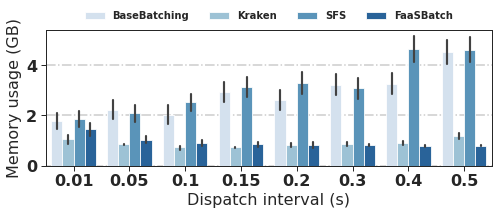

In [59]:
def bar_plot(y, y_label):
    fig, ax1 = plt.subplots(figsize=(8, 2.5))
    sns.barplot(x="dispatch_interval", y=y, hue="strategy", hue_order=legends,
                data=data, palette="Blues", order=sorted(data['dispatch_interval'].unique()))
    data['strategy'].unique()
    sns.move_legend(ax1, "lower center", bbox_to_anchor=(.5, 1),
                    ncol=4, title=None, frameon=False, fontsize=fontsize-6)
    ax1.set_ylabel(y_label)
    ax1.set_xlabel("Dispatch interval (s)")
    fig.show()

bar_plot(y="Mem_Util(0.01*MB)", y_label="Memory usage (GB)")

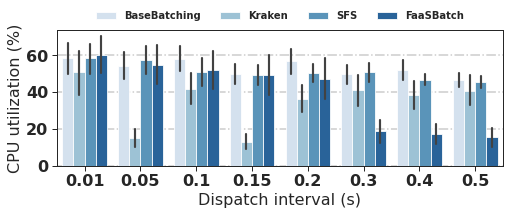

In [60]:
fig, ax1 = plt.subplots(figsize=(8, 2.5))
sns.barplot(x="dispatch_interval", y="CPU_Util(%)", hue="strategy", hue_order=legends,
            data=data, palette="Blues", order=sorted(data['dispatch_interval'].unique()))
data['strategy'].unique()
sns.move_legend(ax1, "lower center", bbox_to_anchor=(.5, 1),
                ncol=4, title=None, frameon=False, fontsize=fontsize-6)
ax1.set_ylabel("CPU utilization (%)")
ax1.set_xlabel("Dispatch interval (s)")
fig.show()